In [1]:

import pandas as pd
import numpy as np 
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score


In [2]:
df=pd.read_csv('archive/IMDb_Movies_India.csv', encoding='ISO-8859-1')

In [3]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
(15509, 10)


In [4]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [5]:
unique_genre = df['Genre'].unique()
print(unique_genre)

['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family, Musical'
 'Act

In [6]:
df['Name'].describe()


count      15509
unique     13838
top       Anjaam
freq           7
Name: Name, dtype: object

In [7]:
df.columns.values

array(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'], dtype=object)

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
miss_val=df.isnull().sum()/df.isnull().count()*100
miss_val2=(round(miss_val,1)).sort_values(ascending=False)
missing_data=pd.concat([total,miss_val2],axis=1)
missing_data.columns=['total','%']
missing_data.head(10)

,total,%
Duration,8269,53.3
Rating,7590,48.9
Votes,7589,48.9
Actor 3,3144,20.3
Actor 2,2384,15.4
Genre,1877,12.1
Actor 1,1617,10.4
Year,528,3.4
Director,525,3.4
Name,0,0.0


In [9]:
missing_values = df.isnull().sum()
missing_values

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)


In [11]:
features=['Name','Year','Duration','Votes','Rating']
df.dropna(subset=features,inplace=True)
miss_val=df.isna().sum()
print(miss_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [12]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)# remove min and convert to int
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

In [13]:
duplicate = df.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
6062,India's Daughter,2015,63,"Documentary, Biography, Crime",8.2,"1,998",Leslee Udwin,Asha Devi,Badri Singh,Satendra
6063,India's Daughter,2015,120,"Action, Crime, Drama",6.9,21,Rupesh Paul,Omkar Das Manikpuri,Amann Grewal,Vishal Om Prakash
12420,Sant Dnyaneshwar,1940,139,Fantasy,7.9,45,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari
12421,Sant Dnyaneshwar,1940,137,Biography,8.1,9,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari


In [14]:
df = df.drop_duplicates(subset=['Name'], keep=False)

In [15]:
rating=df[['Name','Rating']]
print(rating)

                                     Name  Rating
1      #Gadhvi (He thought he was Gandhi)     7.0
3                                 #Yaaram     4.4
5                    ...Aur Pyaar Ho Gaya     4.7
6                               ...Yahaan     7.4
8                      ?: A Question Mark     5.6
...                                   ...     ...
15493                              Zubaan     6.1
15494                            Zubeidaa     6.2
15503                     Zulm Ki Zanjeer     5.8
15505                               Zulmi     4.5
15508                        Zulm-O-Sitam     6.2

[5317 rows x 2 columns]


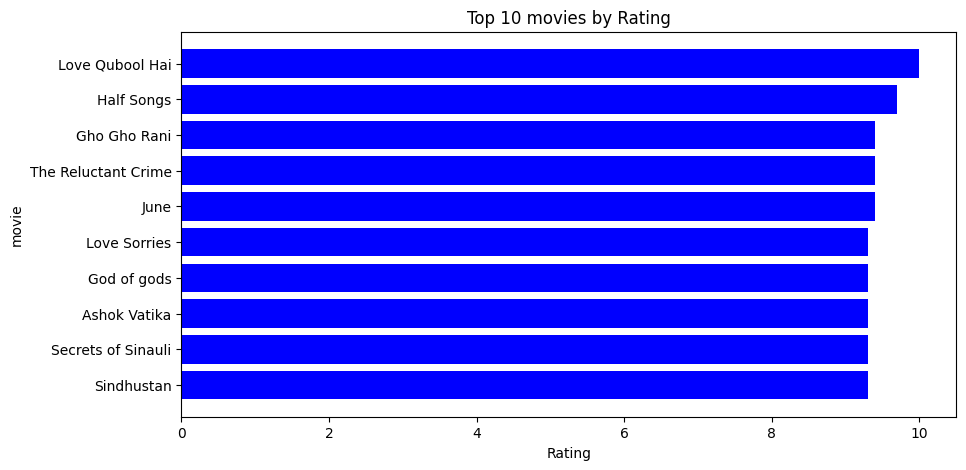

In [16]:
rating_movies=df.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.barh(rating_movies['Name'],rating_movies['Rating'],color='blue')
plt.xlabel('Rating')
plt.ylabel('movie')
plt.title('Top 10 movies by Rating')
plt.gca().invert_yaxis()
plt.show()

In [17]:
df['Votes'].head(50)

1           8
3          35
5         827
6       1,086
8         326
9          11
10         17
11         59
12        983
13        512
15      6,619
18        162
25         26
28      6,329
30      1,002
32         15
33      1,235
34         10
36         16
38      3,100
39      1,559
40      1,811
41      1,069
42      3,223
43      1,892
44         20
45        106
50         21
51         33
53     24,034
54     21,938
55        112
58         94
60          8
61         52
62        361
63        642
69        194
70        514
71        165
73      2,322
74         35
75    357,889
78        358
79          6
82        238
84      4,373
85        392
87        252
88         93
Name: Votes, dtype: object

In [18]:
df['Votes'] = df['Votes'].str.replace(',', '')#As errors='coerce' converts , into nan as well 

In [19]:
df['Votes']= pd.to_numeric(df['Votes'],errors='coerce')
df


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


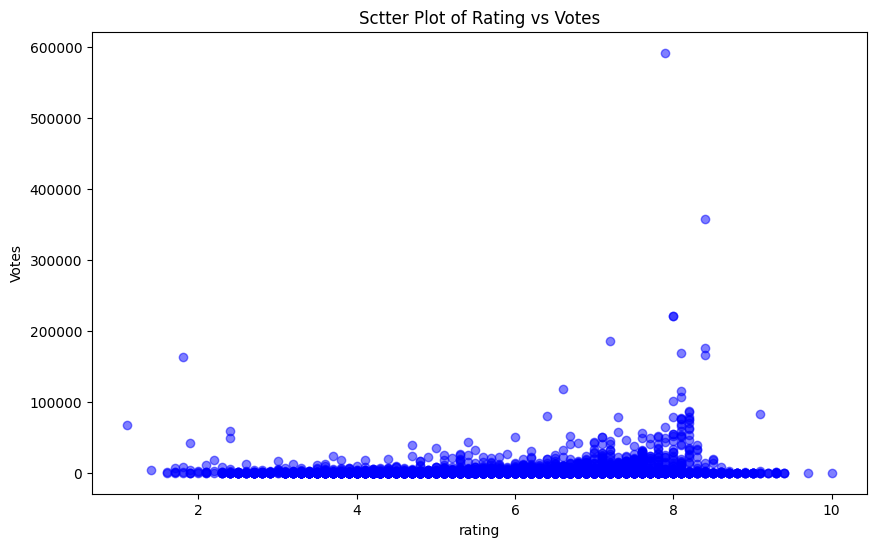

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df['Rating'],df['Votes'],alpha=0.5,color='blue')
plt.xlabel('rating')
plt.ylabel('Votes')
plt.title('Sctter Plot of Rating vs Votes')
plt.show()

In [21]:
highest_vote=df['Votes'].max()
print(highest_vote)
row_with_highest_vote = df.loc[df['Votes'].idxmax()]
print('Row with Highest Vote:')
print(row_with_highest_vote)

591417
Row with Highest Vote:
Name                       Life of Pi
Year                             2012
Duration                          127
Genre       Adventure, Drama, Fantasy
Rating                            7.9
Votes                          591417
Director                      Ang Lee
Actor 1                  Suraj Sharma
Actor 2                   Irrfan Khan
Actor 3                  Adil Hussain
Name: 8219, dtype: object


In [22]:
top_2_rows = df.nlargest(5, 'Votes')
print('Rows with Top 2 Highest Votes:')
print(top_2_rows)

Rows with Top 2 Highest Votes:
                         Name  Year  Duration                      Genre  \
8219               Life of Pi  2012       127  Adventure, Drama, Fantasy   
75                   3 Idiots  2009       170              Comedy, Drama   
8233                     Lion  2016       118           Biography, Drama   
4848                   Gandhi  1982       191  Biography, Drama, History   
14038  The Darjeeling Limited  2007        91   Adventure, Comedy, Drama   

       Rating   Votes              Director       Actor 1        Actor 2  \
8219      7.9  591417               Ang Lee  Suraj Sharma    Irrfan Khan   
75        8.4  357889       Rajkumar Hirani    Aamir Khan       Madhavan   
8233      8.0  220526           Garth Davis     Dev Patel  Nicole Kidman   
4848      8.0  220118  Richard Attenborough  Ben Kingsley   John Gielgud   
14038     7.2  185127          Wes Anderson   Owen Wilson   Adrien Brody   

                 Actor 3  
8219        Adil Hussain  
7

In [23]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

                   index  count
0     Mithun Chakraborty    134
1             Dharmendra    129
2       Amitabh Bachchan    120
3           Akshay Kumar    109
4              Jeetendra    105
...                  ...    ...
5010          Arnali Das      1
5011    Amaresh Banerjee      1
5012     Natalya Gudkova      1
5013     Arindita Kalita      1
5014     Shatakshi Gupta      1

[5015 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

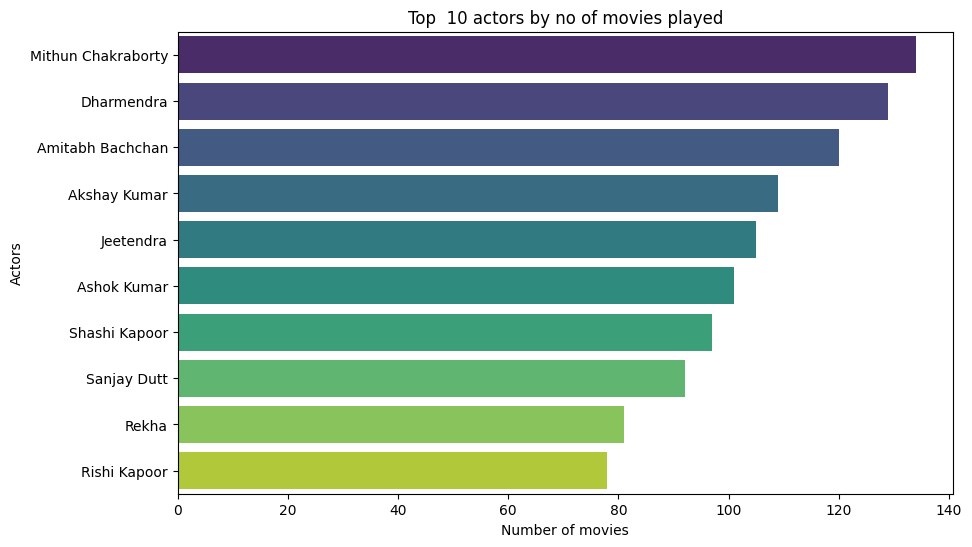

In [24]:
actors=pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']])
actors_count=actors.value_counts().reset_index()
print(actors_count)
actors_count.columns=['Actor','Number of Movies']
plt.figure(figsize=(10,6))
sns.barplot(x='Number of Movies', y='Actor', data=actors_count.head(10), palette='viridis', hue='Actor', legend=False)
plt.xlabel('Number of movies')
plt.ylabel('Actors')
plt.title('Top  10 actors by no of movies played')
plt.show

In [25]:
average_votes = df['Votes'].mean()

# Print the result
print(f'Average Number of Votes: {average_votes}')

Average Number of Votes: 2685.694000376152


In [26]:
C = df['Rating'].mean()  # Mean rating across the whole dataset
m = average_votes  # Minimum number of votes required to be listed (you can choose this based on your dataset)

# Calculate the weighted rating using the IMDb formula
df['Weighted_Rating'] = (df['Votes'] / (df['Votes'] + m)) * df['Rating'] + (m / (df['Votes'] + m)) * C

# Print the DataFrame with the calculated weighted rating
print(df[['Name', 'Votes', 'Rating', 'Weighted_Rating']])

                                     Name  Votes  Rating  Weighted_Rating
1      #Gadhvi (He thought he was Gandhi)      8     7.0         5.926088
3                                 #Yaaram     35     4.4         5.903298
5                    ...Aur Pyaar Ho Gaya    827     4.7         5.634982
6                               ...Yahaan   1086     7.4         6.348200
8                      ?: A Question Mark    326     5.6         5.887938
...                                   ...    ...     ...              ...
15493                              Zubaan    408     6.1         5.946246
15494                            Zubeidaa   1496     6.2         6.022025
15503                     Zulm Ki Zanjeer     44     5.8         5.920908
15505                               Zulmi    655     4.5         5.643907
15508                        Zulm-O-Sitam     20     6.2         5.924937

[5317 rows x 4 columns]


In [27]:
# Drop rows with votes less than the average vote
average_votes = df['Votes'].mean()
df = df[df['Votes'] >= average_votes]

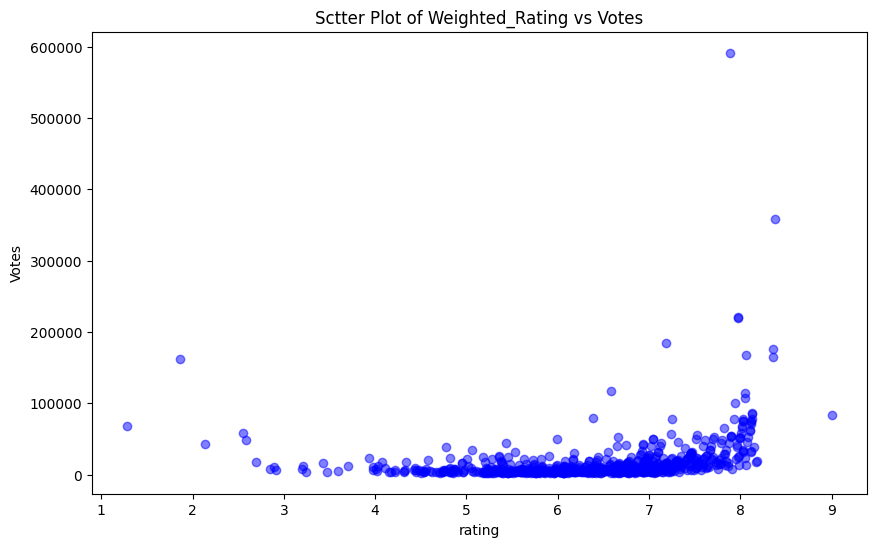

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weighted_Rating'],df['Votes'],alpha=0.5,color='blue')
plt.xlabel('rating')
plt.ylabel('Votes')
plt.title('Sctter Plot of Weighted_Rating vs Votes')
plt.show()

In [29]:
highest_vote=df['Weighted_Rating'].max()
print(highest_vote)
row_with_highest_rating = df.loc[df['Weighted_Rating'].idxmax()]
print('Row with Highest rating:')
print(row_with_highest_rating)
top_10_movies = df.sort_values(by='Weighted_Rating', ascending=False).head(10)

# Print the top 10 movies
print(top_10_movies[['Name', 'Votes', 'Rating', 'Weighted_Rating']])

9.000451743293281
Row with Highest rating:
Name               Soorarai Pottru
Year                          2020
Duration                       153
Genre                        Drama
Rating                         9.1
Votes                        83029
Director             Sudha Kongara
Actor 1                     Suriya
Actor 2                   Madhavan
Actor 3               Paresh Rawal
Weighted_Rating           9.000452
Name: 13384, dtype: object
                      Name   Votes  Rating  Weighted_Rating
13384      Soorarai Pottru   83029     9.1         9.000452
75                3 Idiots  357889     8.4         8.381550
8228   Like Stars on Earth  175810     8.4         8.362729
3410                Dangal  165074     8.4         8.360343
2425          Black Friday   19493     8.5         8.187929
5467           Hanky Panky   18376     8.5         8.171378
2984            Chhichhore   38581     8.3         8.145294
4902    Gangs of Wasseypur   86355     8.2         8.131317
13635

In [30]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Weighted_Rating
15,102 Not Out,2018,102,"Comedy, Drama",7.4,6619,Umesh Shukla,Amitabh Bachchan,Rishi Kapoor,Vijay Raaz,6.973649
28,13B: Fear Has a New Address,2009,146,"Drama, Horror, Mystery",7.3,6329,Vikram K. Kumar,Madhavan,Neetu Chandra,Poonam Dhillon,6.889725
38,1920,2008,138,"Horror, Mystery, Romance",6.4,3100,Vikram Bhatt,Rajniesh Duggall,Adah Sharma,Anjori Alagh,6.178527
42,1942: A Love Story,1994,157,"Action, Drama, History",7.2,3223,Vidhu Vinod Chopra,Anil Kapoor,Jackie Shroff,Manisha Koirala,6.619511
53,2 States,2014,149,"Comedy, Drama, Romance",6.9,24034,Abhishek Varman,Arjun Kapoor,Alia Bhatt,Amrita Singh,6.801787
54,2.0,2018,148,"Action, Sci-Fi",6.2,21938,S. Shankar,Rajinikanth,Akshay Kumar,Amy Jackson,6.169776
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh,8.381550
84,36 China Town,2006,140,"Comedy, Mystery, Thriller",5.7,4373,Abbas Alibhai Burmawalla,Mastan Alibhai Burmawalla,Akshaye Khanna,Kareena Kapoor,5.784805
118,7 Khoon Maaf,2011,137,"Drama, Mystery, Thriller",6.1,5640,Vishal Bhardwaj,Priyanka Chopra Jonas,Vivaan Shah,Neil Nitin Mukesh,6.042868
125,8 x 10 Tasveer,2009,122,"Action, Fantasy, Mystery",5.4,5459,Nagesh Kukunoor,Akshay Kumar,Ayesha Takia,Javed Jaffrey,5.572421


In [31]:
total = df.isnull().sum().sort_values(ascending=False)
miss_val=df.isnull().sum()/df.isnull().count()*100
miss_val2=(round(miss_val,1)).sort_values(ascending=False)
missing_data=pd.concat([total,miss_val2],axis=1)
missing_data.columns=['total','%']
missing_data.head(10)

,total,%
Name,0,0.0
Year,0,0.0
Duration,0,0.0
Genre,0,0.0
Rating,0,0.0
Votes,0,0.0
Director,0,0.0
Actor 1,0,0.0
Actor 2,0,0.0
Actor 3,0,0.0


In [32]:
df = df.dropna(subset=['Genre'])

In [33]:
# Remove rows where all three actors have missing values
df = df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'], how='all')

In [34]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 15 to 15476
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             772 non-null    object 
 1   Year             772 non-null    int32  
 2   Duration         772 non-null    int64  
 3   Genre            772 non-null    object 
 4   Rating           772 non-null    float64
 5   Votes            772 non-null    int64  
 6   Director         772 non-null    object 
 7   Actor 1          772 non-null    object 
 8   Actor 2          772 non-null    object 
 9   Actor 3          772 non-null    object 
 10  Weighted_Rating  772 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 85.5+ KB


In [35]:
# Assuming df is your DataFrame
duplicate_rows = df[df.duplicated()]

# Print or display duplicate rows
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

# Count the total number of duplicate rows
total_duplicates = df.duplicated().sum()
print(f'Total Duplicate Rows: {total_duplicates}')


Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [Name, Year, Duration, Genre, Rating, Votes, Director, Actor 1, Actor 2, Actor 3, Weighted_Rating]
Index: []
Total Duplicate Rows: 0


In [36]:
# Count the number of movies directed by each director
director_movie_counts = df['Director'].value_counts().reset_index()
director_movie_counts.columns = ['Director', 'Number_of_Movies']

print(director_movie_counts)


df['Average_Rating'] = df['Weighted_Rating'] / director_movie_counts['Number_of_Movies'].replace(0, 1)

# Group by Director and calculate the mean Weighted Rating for each director
director_avg_ratings = df.groupby('Director')['Weighted_Rating'].mean().reset_index()
director_avg_ratings.columns = ['Director', 'Average_Weighted_Rating']

# Merge the calculated average weighted ratings back into the director_movie_counts DataFrame
director_movie_counts = pd.merge(director_movie_counts, director_avg_ratings, on='Director')

# Sort the DataFrame based on 'Average_Weighted_Rating' in descending order
director_movie_counts = director_movie_counts.sort_values(by='Average_Weighted_Rating', ascending=False)

# Display the sorted result
print(director_movie_counts[['Director', 'Number_of_Movies', 'Average_Weighted_Rating']])



                     Director  Number_of_Movies
0                David Dhawan                14
1    Abbas Alibhai Burmawalla                13
2              Anurag Kashyap                12
3             Ram Gopal Varma                10
4                 Prabhu Deva                 9
..                        ...               ...
335             Abir Sengupta                 1
336            Abbas Tyrewala                 1
337            Rajkumar Kohli                 1
338               Pooja Bhatt                 1
339            Cherag Ruparel                 1

[340 rows x 2 columns]
                 Director  Number_of_Movies  Average_Weighted_Rating
290            Aamir Khan                 1                 8.362729
118         Sudha Kongara                 2                 8.142997
161       Rahi Anil Barve                 1                 8.120697
207          Ramesh Sippy                 1                 8.089203
184           Aditya Dhar                 1            

In [37]:
total_rating_by_director = df.groupby('Director')['Weighted_Rating'].sum().reset_index()
total_rating_by_director = total_rating_by_director.sort_values(by='Weighted_Rating', ascending=False)
print(total_rating_by_director)



                     Director  Weighted_Rating
46             Anurag Kashyap        85.701350
74               David Dhawan        79.845676
4    Abbas Alibhai Burmawalla        77.833139
232           Ram Gopal Varma        66.087954
271     Sanjay Leela Bhansali        55.124697
..                        ...              ...
283           Shashanka Ghosh         3.697957
317              Umesh Ghadge         3.477103
111         Jagdish A. Sharma         3.244747
157              Maqbool Khan         3.201617
143      Lawrence Raghavendra         2.582477

[340 rows x 2 columns]


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 15 to 15476
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             772 non-null    object 
 1   Year             772 non-null    int32  
 2   Duration         772 non-null    int64  
 3   Genre            772 non-null    object 
 4   Rating           772 non-null    float64
 5   Votes            772 non-null    int64  
 6   Director         772 non-null    object 
 7   Actor 1          772 non-null    object 
 8   Actor 2          772 non-null    object 
 9   Actor 3          772 non-null    object 
 10  Weighted_Rating  772 non-null    float64
 11  Average_Rating   16 non-null     float64
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 91.6+ KB


                  index  count
0          Akshay Kumar     64
1           Salman Khan     52
2        Shah Rukh Khan     44
3      Amitabh Bachchan     43
4            Ajay Devgn     37
..                  ...    ...
727          Olga Anand      1
728      Mikhail Gandhi      1
729      Mamta Kulkarni      1
730     Nishikant Kamat      1
731  Nagarjuna Akkineni      1

[732 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

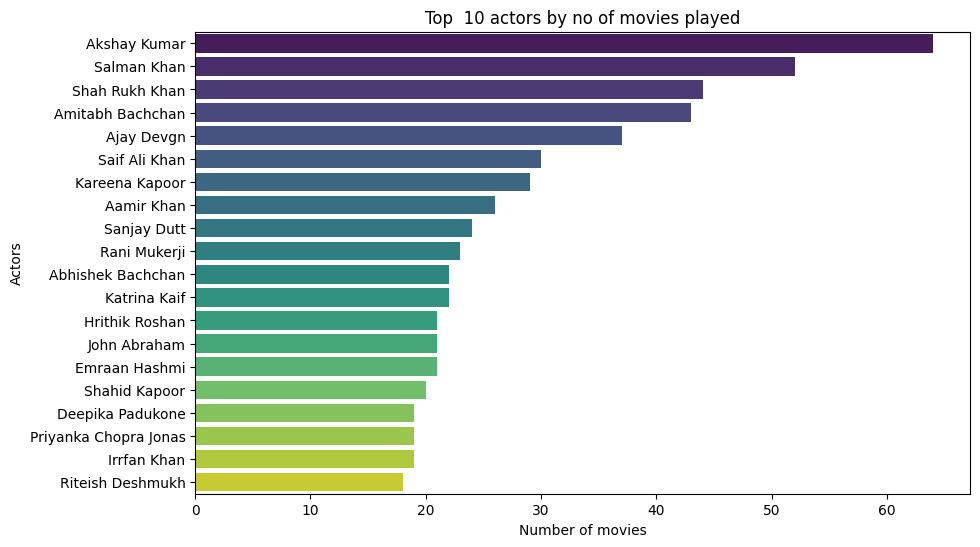

In [39]:
actors=pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']])
actors_count=actors.value_counts().reset_index()
print(actors_count)
actors_count.columns=['Actor','Number of Movies']
plt.figure(figsize=(10,6))
sns.barplot(x='Number of Movies', y='Actor', data=actors_count.head(20), palette='viridis', hue='Actor', legend=False)
plt.xlabel('Number of movies')
plt.ylabel('Actors')
plt.title('Top  10 actors by no of movies played')
plt.show

In [40]:
dummies = df['Genre'].str.get_dummies(', ')
df_genre = pd.concat([df, dummies], axis=1)

In [41]:
df['Genre'].head(20)

15                 Comedy, Drama
28        Drama, Horror, Mystery
38      Horror, Mystery, Romance
42        Action, Drama, History
53        Comedy, Drama, Romance
54                Action, Sci-Fi
75                 Comedy, Drama
84     Comedy, Mystery, Thriller
118     Drama, Mystery, Thriller
125     Action, Fantasy, Mystery
132         Comedy, Crime, Drama
143              Drama, Thriller
148    Action, Adventure, Comedy
150               Action, Comedy
173         Action, Crime, Drama
324         Drama, Family, Music
376         Action, Crime, Drama
386         Action, Crime, Drama
452              Drama, Thriller
485        Drama, Music, Musical
Name: Genre, dtype: object

In [42]:
# Split multiple genres in each row and create a list of genres
df['Genre_List'] = df['Genre'].str.split(', ')

# Create a list of all unique genres
all_genres = [genre for sublist in df['Genre_List'] for genre in sublist]

# Count occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Print or display the genre counts
print(genre_counts)

          Genre  Count
0         Drama    571
1        Comedy    341
2        Action    285
3       Romance    207
4         Crime    183
5      Thriller     99
6       Musical     60
7       Mystery     49
8     Adventure     46
9     Biography     40
10       Family     24
11       Horror     20
12      History     20
13        Sport     19
14      Fantasy     18
15        Music     17
16       Sci-Fi      6
17          War      5
18  Documentary      1


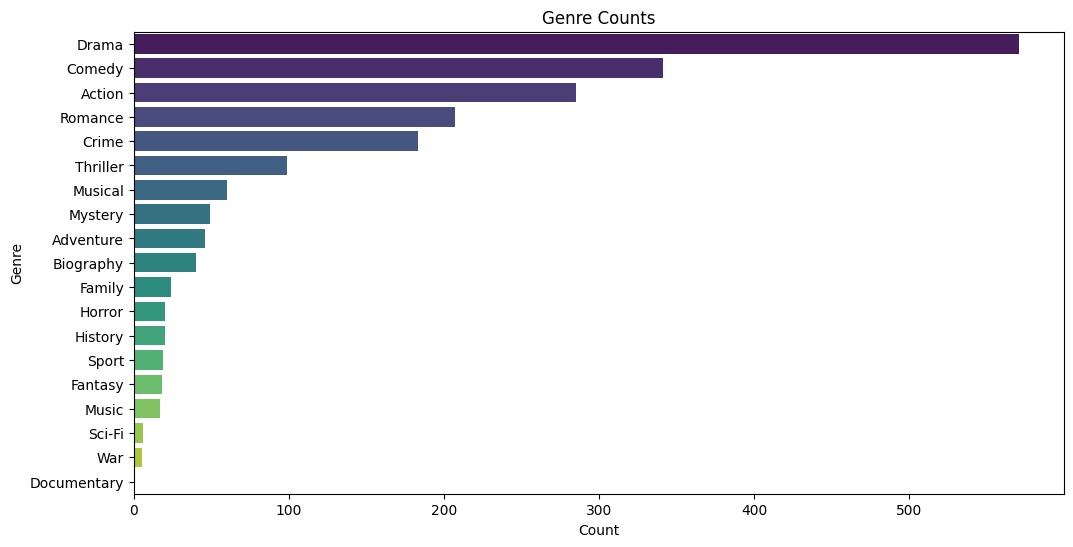

In [43]:
# Plot the genre counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis',hue='Genre',legend=False)
plt.title('Genre Counts')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

featured engineering 


In [44]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Weighted_Rating,Average_Rating,Genre_List
15,102 Not Out,2018,102,"Comedy, Drama",7.4,6619,Umesh Shukla,Amitabh Bachchan,Rishi Kapoor,Vijay Raaz,6.973649,0.996236,"[Comedy, Drama]"
28,13B: Fear Has a New Address,2009,146,"Drama, Horror, Mystery",7.3,6329,Vikram K. Kumar,Madhavan,Neetu Chandra,Poonam Dhillon,6.889725,1.148288,"[Drama, Horror, Mystery]"
38,1920,2008,138,"Horror, Mystery, Romance",6.4,3100,Vikram Bhatt,Rajniesh Duggall,Adah Sharma,Anjori Alagh,6.178527,1.235705,"[Horror, Mystery, Romance]"
42,1942: A Love Story,1994,157,"Action, Drama, History",7.2,3223,Vidhu Vinod Chopra,Anil Kapoor,Jackie Shroff,Manisha Koirala,6.619511,1.323902,"[Action, Drama, History]"
53,2 States,2014,149,"Comedy, Drama, Romance",6.9,24034,Abhishek Varman,Arjun Kapoor,Alia Bhatt,Amrita Singh,6.801787,1.700447,"[Comedy, Drama, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15328,Yuvvraaj,2008,151,"Comedy, Drama, Musical",4.1,4147,Subhash Ghai,Salman Khan,Anil Kapoor,Zayed Khan,4.816514,NaN,"[Comedy, Drama, Musical]"
15341,Zakhm,1998,125,Drama,7.9,3007,Mahesh Bhatt,Ajay Devgn,Pooja Bhatt,Nagarjuna Akkineni,6.967240,NaN,[Drama]
15426,Zero,2018,164,"Comedy, Drama, Romance",5.4,24784,Aanand L. Rai,Shah Rukh Khan,Anushka Sharma,Katrina Kaif,5.451123,NaN,"[Comedy, Drama, Romance]"
15447,Zinda,2006,116,"Action, Drama, Mystery",4.9,3314,Sanjay Gupta,Sanjay Dutt,John Abraham,Lara Dutta,5.357884,NaN,"[Action, Drama, Mystery]"


In [45]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['Weighted_Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Weighted_Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Weighted_Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Weighted_Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Weighted_Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [46]:
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Weighted_Rating']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)


rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [49]:
print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')

print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.22412963555461848
Mean absolute error:  0.3483656697367979
R2 score:  0.7959224180429545


The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.19889462594481944
Mean absolute error:  0.29291704153781695
R2 score:  0.8188997442188836


In [50]:
X.head()


,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
15,2018,6619,102,6.811644,7.484748,6.325647,6.717347,6.547651
28,2009,6329,146,6.754420,6.889725,6.999815,6.889725,6.889725
38,2008,3100,138,5.960558,5.939422,6.178527,5.885990,6.178527
42,1994,3223,157,6.907217,6.095697,5.976526,5.712275,6.567500
53,2014,24034,149,6.266054,5.415149,5.970613,5.746576,6.801787


In [51]:
y.head()


15    6.973649
28    6.889725
38    6.178527
42    6.619511
53    6.801787
Name: Weighted_Rating, dtype: float64

In [52]:
data = {'Year': [2016], 'Votes': [500], 'Duration': [121], 'Genre_mean_rating': [4.5], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
df = pd.DataFrame(data)

In [53]:
predicted_rating = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.357296216674209
